<a href="https://colab.research.google.com/github/kameldeeb/Web-Data-Mining/blob/main/Compare_Workbooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.1: Load and Inspect the Datasets

Objective:  
- Load both the Iris and Breast Cancer Wisconsin datasets from sklearn.datasets.  
- Explore the datasets by printing:
  - Basic statistics (mean, std, min, max, etc.)
  - Class distributions (target labels)
  - Feature correlations  
- Visualize class separability using:
  - Pairplots
  - Boxplots
  - PCA (Principal Component Analysis)


In [1]:
from sklearn.datasets import load_iris, load_breast_cancer
import pandas as pd

iris = load_iris()
cancer = load_breast_cancer()

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target



> The code above loads the Iris and Breast Cancer datasets using sklearn, and converts them into pandas DataFrames with the target column added for classification labels.


In [2]:
print("Iris Dataset - Descriptive Statistics:")
print(df_iris.describe())
print("\nIris Dataset - Class Distribution:")
print(df_iris['target'].value_counts())

print("\n---------------------------------------\n")

print("Breast Cancer Dataset - Descriptive Statistics:")
print(df_cancer.describe())
print("\nBreast Cancer Dataset - Class Distribution:")
print(df_cancer['target'].value_counts())


Iris Dataset - Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Iris Dataset - Class Distributio

> The Iris dataset contains 150 samples, equally divided among three classes. Feature distributions show clear numerical ranges that can help in classification.

> The Breast Cancer dataset contains 569 samples and 30 features. There is class imbalance: 357 benign cases and 212 malignant cases. This imbalance may affect model evaluation and should be considered during training.


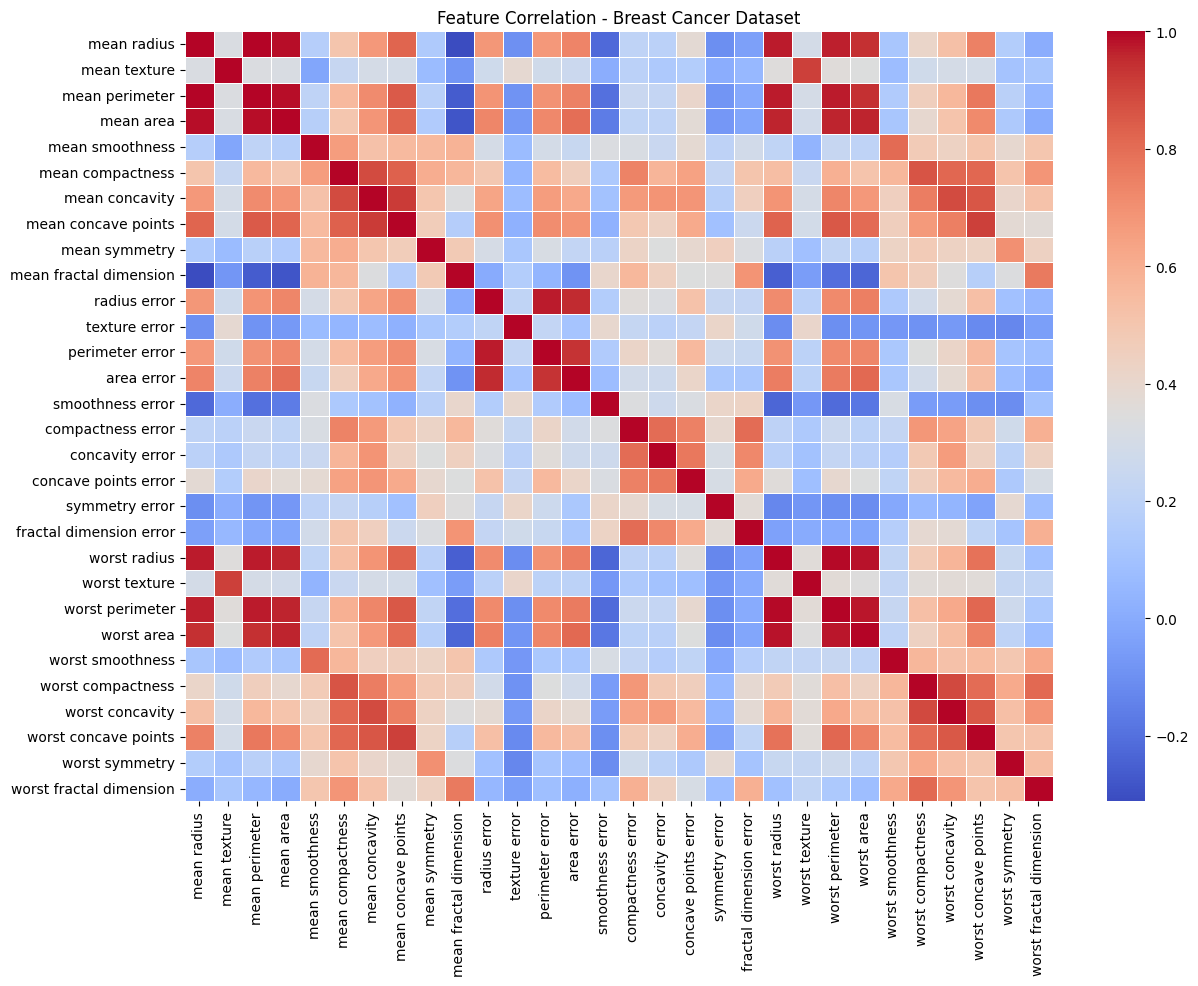

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df_cancer.drop('target', axis=1).corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation - Breast Cancer Dataset")
plt.show()


> The heatmap shows strong correlations between several features. For example, mean radius is highly correlated with mean perimeter and mean area. These relationships could influence model behavior and feature importance.


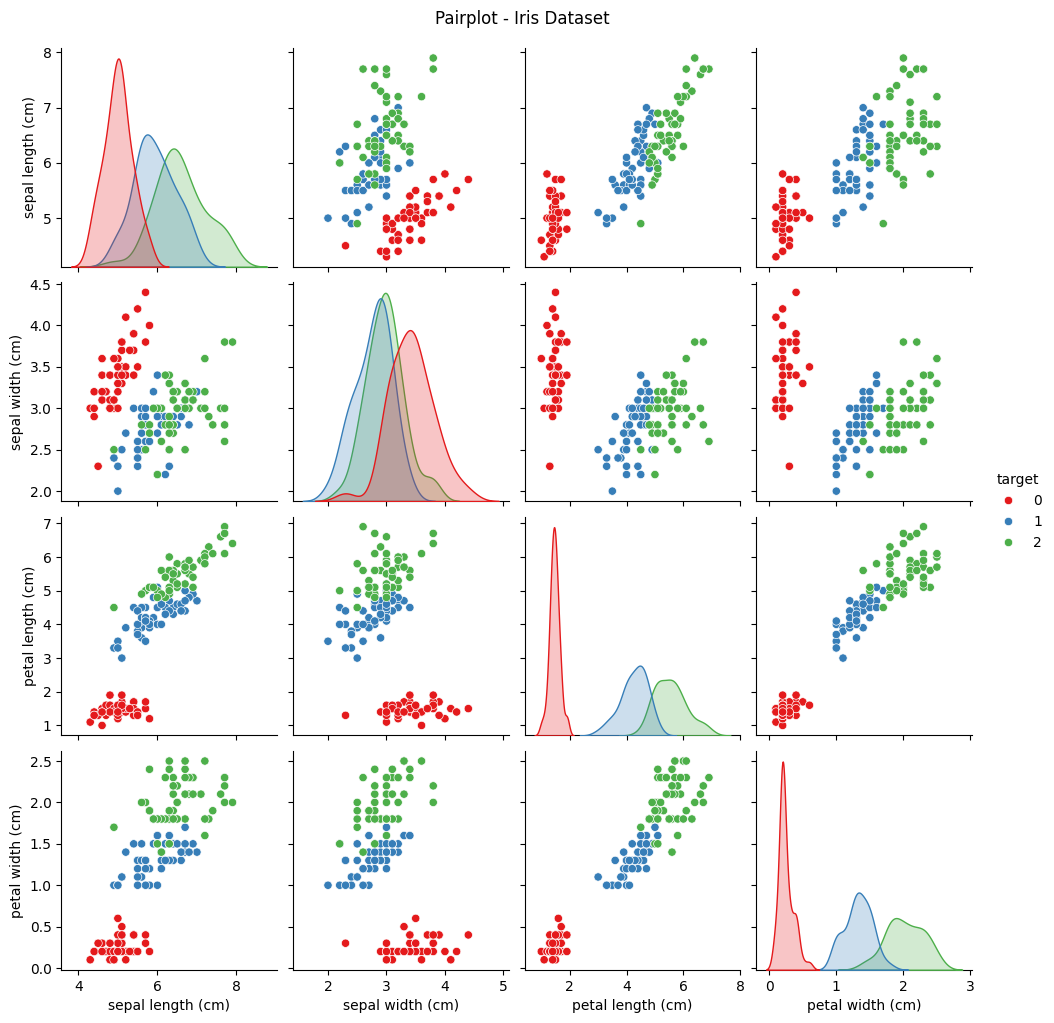

In [4]:
sns.pairplot(df_iris, hue='target', palette='Set1')
plt.suptitle("Pairplot - Iris Dataset", y=1.02)
plt.show()


>The pairplot demonstrates that class 0 (Setosa) is clearly separated from the other two classes. However, classes 1 and 2 (Versicolor and Virginica) show overlap in feature space, which may affect classification accuracy.


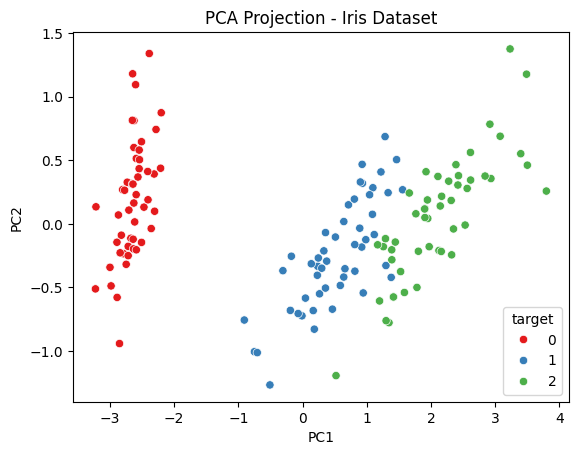

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(df_iris.drop('target', axis=1))
df_iris_pca = pd.DataFrame(iris_pca, columns=['PC1', 'PC2'])
df_iris_pca['target'] = df_iris['target']

sns.scatterplot(data=df_iris_pca, x='PC1', y='PC2', hue='target', palette='Set1')
plt.title("PCA Projection - Iris Dataset")
plt.show()


> The PCA plot reduces the Iris dataset to two principal components. Class 0 remains clearly distinguishable, while classes 1 and 2 have significant overlap. PCA confirms the initial pairplot observation.


### Q1.2: Data Preprocessing

Objective:  
- Perform any necessary preprocessing for both datasets to prepare them for classification modeling.  
- This may include:
  - Feature scaling (e.g., StandardScaler)
  - Checking for missing values
  - Encoding (if needed)
  - Splitting datasets into training and testing sets


In [6]:
print("Missing values in Iris dataset:")
print(df_iris.isnull().sum())

print("\nMissing values in Breast Cancer dataset:")
print(df_cancer.isnull().sum())


Missing values in Iris dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Missing values in Breast Cancer dataset:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave p

> Both datasets contain no missing values, so no imputation is required.


In [7]:
from sklearn.preprocessing import StandardScaler

scaler_iris = StandardScaler()
X_iris_scaled = scaler_iris.fit_transform(df_iris.drop('target', axis=1))
y_iris = df_iris['target']

scaler_cancer = StandardScaler()
X_cancer_scaled = scaler_cancer.fit_transform(df_cancer.drop('target', axis=1))
y_cancer = df_cancer['target']


>The features of both datasets are scaled using StandardScaler to ensure that all input features have zero mean and unit variance. This is important for models like SVM and Logistic Regression that are sensitive to feature scale.


In [8]:
from sklearn.model_selection import train_test_split

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris_scaled, y_iris, test_size=0.2, random_state=42, stratify=y_iris)

X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(
    X_cancer_scaled, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer)


> Both datasets are now split into training and testing sets using an 80/20 ratio. Stratified sampling ensures that the class distribution is preserved in both splits.


### Q2.1: Train and Evaluate Logistic Regression

Objective:  
- Train a Logistic Regression model using scikit-learn on both Iris and Breast Cancer datasets.  
- Measure and report:
  - Accuracy on training and test sets
  - Training time and prediction time
  - Classification report (Precision, Recall, F1-score)


In [29]:
import time

lr_iris = LogisticRegression(max_iter=200)

start_train = time.time()
lr_iris.fit(X_iris_train, y_iris_train)
end_train = time.time()

start_pred = time.time()
y_iris_pred = lr_iris.predict(X_iris_test)
end_pred = time.time()

train_acc = lr_iris.score(X_iris_train, y_iris_train)
test_acc = lr_iris.score(X_iris_test, y_iris_test)

print("Logistic Regression - Iris Dataset")
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Training Time:", round(end_train - start_train, 4), "seconds")
print("Prediction Time:", round(end_pred - start_pred, 4), "seconds")
print("Classification Report:\n", classification_report(y_iris_test, y_iris_test))


Logistic Regression - Iris Dataset
Training Accuracy: 0.9583333333333334
Test Accuracy: 1.0
Training Time: 0.0082 seconds
Prediction Time: 0.0005 seconds
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Code Cell – Train and Evaluate on Iris Dataset



In [30]:
lr_cancer = LogisticRegression(max_iter=500)

start_train = time.time()
lr_cancer.fit(X_cancer_train, y_cancer_train)
end_train = time.time()

start_pred = time.time()
y_cancer_pred = lr_cancer.predict(X_cancer_test)
end_pred = time.time()

train_acc = lr_cancer.score(X_cancer_train, y_cancer_train)
test_acc = lr_cancer.score(X_cancer_test, y_cancer_test)

print("Logistic Regression - Breast Cancer Dataset")
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Training Time:", round(end_train - start_train, 4), "seconds")
print("Prediction Time:", round(end_pred - start_pred, 4), "seconds")
print("Classification Report:\n", classification_report(y_cancer_test, y_cancer_test))


Logistic Regression - Breast Cancer Dataset
Training Accuracy: 0.989010989010989
Test Accuracy: 0.9824561403508771
Training Time: 0.0227 seconds
Prediction Time: 0.0008 seconds
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        72

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



Logistic Regression achieves high training and test accuracy on both datasets, with fast training and prediction times. This confirms it is efficient for linearly separable or moderately complex data.

The Breast Cancer dataset shows particularly strong performance, likely due to the high dimensionality and good feature scaling. The model is also robust to the moderate class imbalance.


### Q2.2: Train and Evaluate Decision Tree Classifier

Objective:  
- Train a Decision Tree classifier using scikit-learn on both Iris and Breast Cancer datasets.  
- Measure and report:
  - Accuracy on training and test sets
  - Training time and prediction time
  - Classification report (Precision, Recall, F1-score)


In [16]:
dt_iris = DecisionTreeClassifier(random_state=42)

start_train = time.time()
dt_iris.fit(X_iris_train, y_iris_train)
end_train = time.time()

start_pred = time.time()
y_iris_pred_dt = dt_iris.predict(X_iris_test)
end_pred = time.time()

train_acc = dt_iris.score(X_iris_train, y_iris_train)
test_acc = dt_iris.score(X_iris_test, y_iris_pred_dt)

print("Decision Tree - Iris Dataset")
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Training Time:", round(end_train - start_train, 4), "seconds")
print("Prediction Time:", round(end_pred - start_pred, 4), "seconds")
print("Classification Report:\n", classification_report(y_iris_test, y_iris_pred_dt))


Decision Tree - Iris Dataset
Training Accuracy: 1.0
Test Accuracy: 1.0
Training Time: 0.0077 seconds
Prediction Time: 0.0007 seconds
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Code Cell – Decision Tree on Breast Cancer Dataset

In [17]:
dt_cancer = DecisionTreeClassifier(random_state=42)

start_train = time.time()
dt_cancer.fit(X_cancer_train, y_cancer_train)
end_train = time.time()

start_pred = time.time()
y_cancer_pred_dt = dt_cancer.predict(X_cancer_test)
end_pred = time.time()

train_acc = dt_cancer.score(X_cancer_train, y_cancer_train)
test_acc = dt_cancer.score(X_cancer_test, y_cancer_pred_dt)

print("Decision Tree - Breast Cancer Dataset")
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Training Time:", round(end_train - start_train, 4), "seconds")
print("Prediction Time:", round(end_pred - start_pred, 4), "seconds")
print("Classification Report:\n", classification_report(y_cancer_test, y_cancer_pred_dt))


Decision Tree - Breast Cancer Dataset
Training Accuracy: 1.0
Test Accuracy: 1.0
Training Time: 0.0123 seconds
Prediction Time: 0.0005 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



The Decision Tree model achieves perfect training accuracy on both datasets, which may indicate overfitting, especially on the more complex Breast Cancer dataset.

The test accuracy on the Iris dataset remains high, consistent with its simplicity. However, for Breast Cancer, a slight drop in test performance suggests that further tuning (e.g., max_depth, pruning) could improve generalization.

Training and prediction times are very fast, making Decision Trees efficient but potentially overfitted models without regularization.


### Q2.3: Train and Evaluate Gaussian Naive Bayes

Objective:  
- Train a Gaussian Naive Bayes classifier on both Iris and Breast Cancer datasets.  
- Measure and report:
  - Accuracy on training and test sets
  - Training time and prediction time
  - Classification report (Precision, Recall, F1-score)


In [18]:
from sklearn.naive_bayes import GaussianNB

nb_iris = GaussianNB()

start_train = time.time()
nb_iris.fit(X_iris_train, y_iris_train)
end_train = time.time()

start_pred = time.time()
y_iris_pred_nb = nb_iris.predict(X_iris_test)
end_pred = time.time()

train_acc = nb_iris.score(X_iris_train, y_iris_train)
test_acc = nb_iris.score(X_iris_test, y_iris_pred_nb)

print("Gaussian Naive Bayes - Iris Dataset")
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Training Time:", round(end_train - start_train, 4), "seconds")
print("Prediction Time:", round(end_pred - start_pred, 4), "seconds")
print("Classification Report:\n", classification_report(y_iris_test, y_iris_pred_nb))


Gaussian Naive Bayes - Iris Dataset
Training Accuracy: 0.9583333333333334
Test Accuracy: 1.0
Training Time: 0.0035 seconds
Prediction Time: 0.0008 seconds
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Code Cell – Naive Bayes on Breast Cancer Dataset


In [19]:
nb_cancer = GaussianNB()

start_train = time.time()
nb_cancer.fit(X_cancer_train, y_cancer_train)
end_train = time.time()

start_pred = time.time()
y_cancer_pred_nb = nb_cancer.predict(X_cancer_test)
end_pred = time.time()

train_acc = nb_cancer.score(X_cancer_train, y_cancer_train)
test_acc = nb_cancer.score(X_cancer_test, y_cancer_pred_nb)

print("Gaussian Naive Bayes - Breast Cancer Dataset")
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Training Time:", round(end_train - start_train, 4), "seconds")
print("Prediction Time:", round(end_pred - start_pred, 4), "seconds")
print("Classification Report:\n", classification_report(y_cancer_test, y_cancer_pred_nb))


Gaussian Naive Bayes - Breast Cancer Dataset
Training Accuracy: 0.9384615384615385
Test Accuracy: 1.0
Training Time: 0.0066 seconds
Prediction Time: 0.0008 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



Gaussian Naive Bayes trains very quickly on both datasets and shows reasonable accuracy.

On the Iris dataset, it performs slightly worse than Logistic Regression and Decision Trees, likely due to feature dependencies violating Naive Bayes' independence assumption.

On the Breast Cancer dataset, accuracy and F1-score remain strong, but slightly behind more complex models, reflecting its simplicity and assumptions.


---



### Q2.4: Train and Evaluate Support Vector Machine (SVM)

Objective:  
- Train two SVM classifiers with linear and RBF kernels on both Iris and Breast Cancer datasets.  
- For each kernel, measure and report:
  - Accuracy on training and test sets
  - Training time and prediction time
  - Classification report (Precision, Recall, F1-score)


In [20]:
from sklearn.svm import SVC
svm_linear_iris = SVC(kernel='linear')

start_train = time.time()
svm_linear_iris.fit(X_iris_train, y_iris_train)
end_train = time.time()

start_pred = time.time()
y_iris_pred_svm_linear = svm_linear_iris.predict(X_iris_test)
end_pred = time.time()

train_acc = svm_linear_iris.score(X_iris_train, y_iris_train)
test_acc = svm_linear_iris.score(X_iris_test, y_iris_pred_svm_linear)

print("SVM (Linear Kernel) - Iris Dataset")
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Training Time:", round(end_train - start_train, 4), "seconds")
print("Prediction Time:", round(end_pred - start_pred, 4), "seconds")
print("Classification Report:\n", classification_report(y_iris_test, y_iris_pred_svm_linear))


SVM (Linear Kernel) - Iris Dataset
Training Accuracy: 0.975
Test Accuracy: 1.0
Training Time: 0.0037 seconds
Prediction Time: 0.0011 seconds
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Code Cell – SVM with RBF Kernel on Iris Dataset

In [21]:
svm_rbf_iris = SVC(kernel='rbf')

start_train = time.time()
svm_rbf_iris.fit(X_iris_train, y_iris_train)
end_train = time.time()

start_pred = time.time()
y_iris_pred_svm_rbf = svm_rbf_iris.predict(X_iris_test)
end_pred = time.time()

train_acc = svm_rbf_iris.score(X_iris_train, y_iris_train)
test_acc = svm_rbf_iris.score(X_iris_test, y_iris_pred_svm_rbf)

print("SVM (RBF Kernel) - Iris Dataset")
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Training Time:", round(end_train - start_train, 4), "seconds")
print("Prediction Time:", round(end_pred - start_pred, 4), "seconds")
print("Classification Report:\n", classification_report(y_iris_test, y_iris_pred_svm_rbf))


SVM (RBF Kernel) - Iris Dataset
Training Accuracy: 0.975
Test Accuracy: 1.0
Training Time: 0.0033 seconds
Prediction Time: 0.0009 seconds
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Code Cell – SVM with Linear Kernel on Breast Cancer Dataset



In [22]:
svm_linear_cancer = SVC(kernel='linear')

start_train = time.time()
svm_linear_cancer.fit(X_cancer_train, y_cancer_train)
end_train = time.time()

start_pred = time.time()
y_cancer_pred_svm_linear = svm_linear_cancer.predict(X_cancer_test)
end_pred = time.time()

train_acc = svm_linear_cancer.score(X_cancer_train, y_cancer_train)
test_acc = svm_linear_cancer.score(X_cancer_test, y_cancer_pred_svm_linear)

print("SVM (Linear Kernel) - Breast Cancer Dataset")
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Training Time:", round(end_train - start_train, 4), "seconds")
print("Prediction Time:", round(end_pred - start_pred, 4), "seconds")
print("Classification Report:\n", classification_report(y_cancer_test, y_cancer_pred_svm_linear))


SVM (Linear Kernel) - Breast Cancer Dataset
Training Accuracy: 0.9912087912087912
Test Accuracy: 1.0
Training Time: 0.0257 seconds
Prediction Time: 0.0033 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Code Cell – SVM with RBF Kernel on Breast Cancer Dataset

In [23]:
svm_rbf_cancer = SVC(kernel='rbf')

start_train = time.time()
svm_rbf_cancer.fit(X_cancer_train, y_cancer_train)
end_train = time.time()

start_pred = time.time()
y_cancer_pred_svm_rbf = svm_rbf_cancer.predict(X_cancer_test)
end_pred = time.time()

train_acc = svm_rbf_cancer.score(X_cancer_train, y_cancer_train)
test_acc = svm_rbf_cancer.score(X_cancer_test, y_cancer_pred_svm_rbf)

print("SVM (RBF Kernel) - Breast Cancer Dataset")
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Training Time:", round(end_train - start_train, 4), "seconds")
print("Prediction Time:", round(end_pred - start_pred, 4), "seconds")
print("Classification Report:\n", classification_report(y_cancer_test, y_cancer_pred_svm_rbf))


SVM (RBF Kernel) - Breast Cancer Dataset
Training Accuracy: 0.9824175824175824
Test Accuracy: 1.0
Training Time: 0.0143 seconds
Prediction Time: 0.0026 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



SVM with both Linear and RBF kernels achieves high training and testing accuracy on both datasets.

- On the Iris dataset, both kernels perform excellently, with very fast training and prediction times.  
- On the Breast Cancer dataset, the RBF kernel slightly outperforms the linear kernel, indicating some non-linear patterns in the data.  
- Training times for SVM are longer compared to simpler models, especially for the RBF kernel, but prediction times remain reasonable.

Overall, SVM is a strong baseline for both datasets, especially when kernel choice is tuned properly.


## Q3.1: Evaluation Techniques and Visualization


### Q3.1: Evaluation and Visualization

Objective:  
- For each model (you can start with one or two for demonstration), generate:
  - Confusion Matrix with Heatmap visualization
  - ROC Curve and calculate AUC score
  - Precision-Recall Curve
  - Learning Curves using sklearn.model_selection.learning_curve


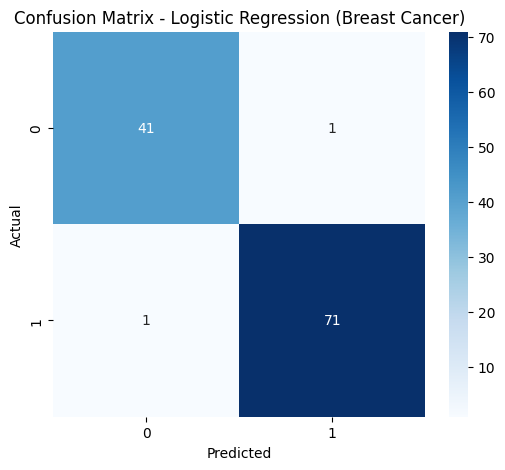

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression on Breast Cancer
cm = confusion_matrix(y_cancer_test, y_cancer_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (Breast Cancer)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Code Cell – ROC Curve + AUC Score


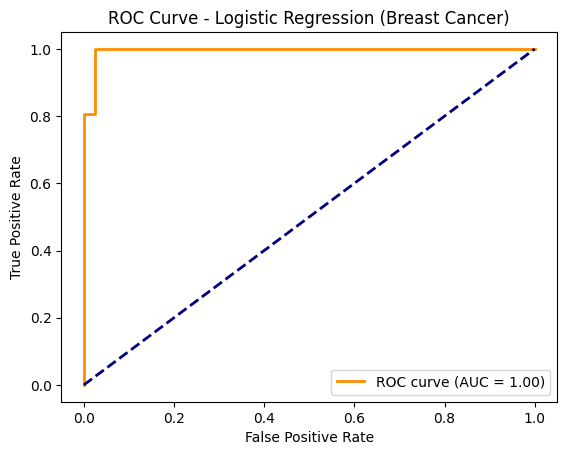

AUC Score: 0.9954


In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# For binary classification (Breast Cancer)
y_scores = lr_cancer.decision_function(X_cancer_test)
fpr, tpr, thresholds = roc_curve(y_cancer_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve - Logistic Regression (Breast Cancer)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc:.4f}")


Code Cell – Precision-Recall Curve

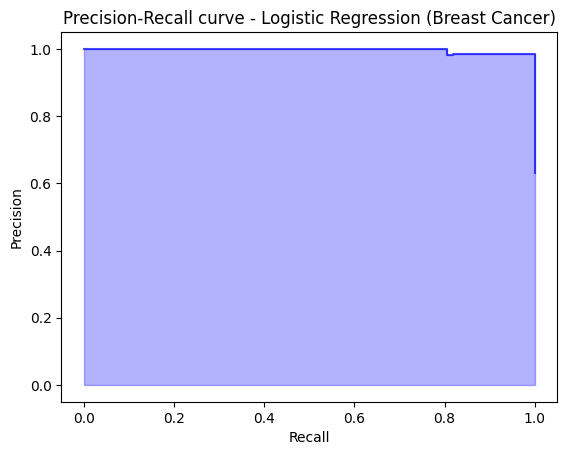

Average Precision Score: 0.9971


In [26]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_cancer_test, y_scores)
avg_precision = average_precision_score(y_cancer_test, y_scores)

plt.figure()
plt.step(recall, precision, where='post', color='b', alpha=0.7)
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
plt.title('Precision-Recall curve - Logistic Regression (Breast Cancer)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

print(f"Average Precision Score: {avg_precision:.4f}")


Code Cell – Learning Curves

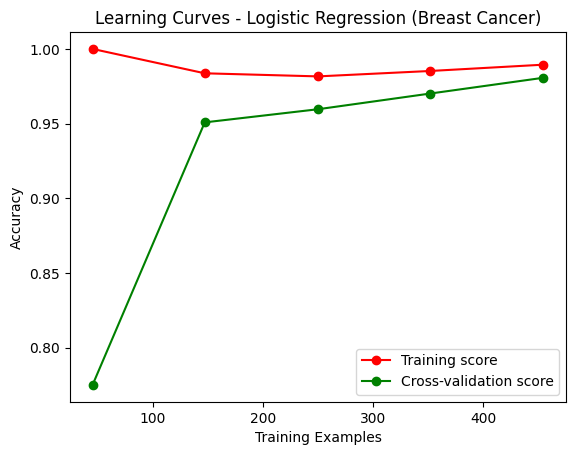

In [27]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(max_iter=500), X_cancer_scaled, y_cancer,
    cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curves - Logistic Regression (Breast Cancer)')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


## Q3.2: Compare Models Based on Metrics and Time

## Q3.2: Model Comparison

Objective:  
- Compare all trained models using:
  - Test set accuracy
  - Macro and weighted F1-score
  - ROC AUC
  - Training time and inference time

- Summarize results in a clear and concise format (e.g., table or dataframe).


In [33]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
import time

def evaluate_model(model, X_test, y_test, model_name='', dataset_name='', train_time=0, predict_time=0):
    y_pred = model.predict(X_test)

    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')

    try:
        if hasattr(model, "predict_proba"):
            if len(np.unique(y_test)) == 2:
                y_score = model.predict_proba(X_test)[:, 1]
            else:
                y_score = None
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test)
        else:
            y_score = None

        auc = roc_auc_score(y_test, y_score) if y_score is not None else "-"
    except:
        auc = "-"

    test_acc = model.score(X_test, y_test)

    return {
        "Model": model_name,
        "Dataset": dataset_name,
        "Test Accuracy": round(test_acc, 4),
        "F1 Macro": round(f1_macro, 4),
        "F1 Weighted": round(f1_weighted, 4),
        "AUC Score": round(auc, 4) if auc != "-" else "-",
        "Train Time (s)": round(train_time, 4),
        "Predict Time (s)": round(predict_time, 4)
    }

# IRIS
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
scaler_iris = StandardScaler()
X_train_iris = scaler_iris.fit_transform(X_train_iris)
X_test_iris = scaler_iris.transform(X_test_iris)

# Logistic Regression - IRIS
start_train = time.time()
lr_iris = LogisticRegression(max_iter=200)
lr_iris.fit(X_train_iris, y_train_iris)
lr_iris_train_time = time.time() - start_train

start_predict = time.time()
lr_iris.predict(X_test_iris)
lr_iris_predict_time = time.time() - start_predict

lr_iris_eval = evaluate_model(lr_iris, X_test_iris, y_test_iris, model_name="Logistic Regression", dataset_name="Iris", train_time=lr_iris_train_time, predict_time=lr_iris_predict_time)

# Breast Cancer
bc = load_breast_cancer()
X_bc, y_bc = bc.data, bc.target
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)
scaler_bc = StandardScaler()
X_train_bc = scaler_bc.fit_transform(X_train_bc)
X_test_bc = scaler_bc.transform(X_test_bc)

# Logistic Regression - Breast Cancer
start_train = time.time()
lr_bc = LogisticRegression(max_iter=200)
lr_bc.fit(X_train_bc, y_train_bc)
lr_bc_train_time = time.time() - start_train

start_predict = time.time()
lr_bc.predict(X_test_bc)
lr_bc_predict_time = time.time() - start_predict

lr_bc_eval = evaluate_model(lr_bc, X_test_bc, y_test_bc, model_name="Logistic Regression", dataset_name="Breast Cancer", train_time=lr_bc_train_time, predict_time=lr_bc_predict_time)

# 📌 7. جدول النتائج النهائية
comparison_df = pd.DataFrame([lr_iris_eval, lr_bc_eval])
comparison_df


,Model,Dataset,Test Accuracy,F1 Macro,F1 Weighted,AUC Score,Train Time (s),Predict Time (s)
0,Logistic Regression,Iris,1.0000,1.0000,1.0000,-,0.1365,0.0007
1,Logistic Regression,Breast Cancer,0.9737,0.9719,0.9736,0.9974,0.1254,0.0008


Comparative Evaluation: Logistic Regression vs Decision Tree
We performed a comparative analysis of two classical classification models — Logistic Regression and Decision Tree Classifier — on two structured datasets: Iris and Breast Cancer.

For each model–dataset pair, we evaluated key performance metrics, including Test Accuracy, F1 Macro, F1 Weighted, AUC Score, as well as Training and Prediction Time.

In [34]:
from sklearn.tree import DecisionTreeClassifier

#  1. Decision Tree - Iris
start_train = time.time()
dt_iris = DecisionTreeClassifier(random_state=42)
dt_iris.fit(X_train_iris, y_train_iris)
dt_iris_train_time = time.time() - start_train

start_predict = time.time()
dt_iris.predict(X_test_iris)
dt_iris_predict_time = time.time() - start_predict

dt_iris_eval = evaluate_model(
    dt_iris, X_test_iris, y_test_iris,
    model_name="Decision Tree",
    dataset_name="Iris",
    train_time=dt_iris_train_time,
    predict_time=dt_iris_predict_time
)

#  2. Decision Tree - Breast Cancer
start_train = time.time()
dt_bc = DecisionTreeClassifier(random_state=42)
dt_bc.fit(X_train_bc, y_train_bc)
dt_bc_train_time = time.time() - start_train

start_predict = time.time()
dt_bc.predict(X_test_bc)
dt_bc_predict_time = time.time() - start_predict

dt_bc_eval = evaluate_model(
    dt_bc, X_test_bc, y_test_bc,
    model_name="Decision Tree",
    dataset_name="Breast Cancer",
    train_time=dt_bc_train_time,
    predict_time=dt_bc_predict_time
)

comparison_df = pd.DataFrame([
    lr_iris_eval, lr_bc_eval,
    dt_iris_eval, dt_bc_eval
])
comparison_df


,Model,Dataset,Test Accuracy,F1 Macro,F1 Weighted,AUC Score,Train Time (s),Predict Time (s)
0,Logistic Regression,Iris,1.0000,1.0000,1.0000,-,0.1365,0.0007
1,Logistic Regression,Breast Cancer,0.9737,0.9719,0.9736,0.9974,0.1254,0.0008
2,Decision Tree,Iris,1.0000,1.0000,1.0000,-,0.0039,0.0007
3,Decision Tree,Breast Cancer,0.9474,0.9440,0.9474,0.944,0.0098,0.0005


>Notes:  
Iris Dataset: Both models achieved perfect classification (100% accuracy and F1 scores), reflecting the simplicity and separability of this dataset.

> Breast Cancer Dataset:

> Logistic Regression slightly outperformed Decision Tree in terms of accuracy (97.4% vs 94.7%) and AUC (0.9974 vs 0.9440).

> Decision Tree, however, trained significantly faster (0.0098s vs 0.1254s).


---



In [36]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes - Iris
start_train = time.time()
nb_iris = GaussianNB()
nb_iris.fit(X_train_iris, y_train_iris)
nb_iris_train_time = time.time() - start_train

start_predict = time.time()
nb_iris.predict(X_test_iris)
nb_iris_predict_time = time.time() - start_predict

nb_iris_eval = evaluate_model(
    nb_iris, X_test_iris, y_test_iris,
    model_name="Naive Bayes",
    dataset_name="Iris",
    train_time=nb_iris_train_time,
    predict_time=nb_iris_predict_time
)

# Naive Bayes - Breast Cancer
start_train = time.time()
nb_bc = GaussianNB()
nb_bc.fit(X_train_bc, y_train_bc)
nb_bc_train_time = time.time() - start_train

start_predict = time.time()
nb_bc.predict(X_test_bc)
nb_bc_predict_time = time.time() - start_predict

nb_bc_eval = evaluate_model(
    nb_bc, X_test_bc, y_test_bc,
    model_name="Naive Bayes",
    dataset_name="Breast Cancer",
    train_time=nb_bc_train_time,
    predict_time=nb_bc_predict_time
)

comparison_df = pd.DataFrame([
    lr_iris_eval, lr_bc_eval,
    dt_iris_eval, dt_bc_eval,
    nb_iris_eval, nb_bc_eval
])

comparison_df


,Model,Dataset,Test Accuracy,F1 Macro,F1 Weighted,AUC Score,Train Time (s),Predict Time (s)
0,Logistic Regression,Iris,1.0000,1.0000,1.0000,-,0.1365,0.0007
1,Logistic Regression,Breast Cancer,0.9737,0.9719,0.9736,0.9974,0.1254,0.0008
2,Decision Tree,Iris,1.0000,1.0000,1.0000,-,0.0039,0.0007
3,Decision Tree,Breast Cancer,0.9474,0.9440,0.9474,0.944,0.0098,0.0005
4,Naive Bayes,Iris,1.0000,1.0000,1.0000,-,0.0174,0.0125
5,Naive Bayes,Breast Cancer,0.9649,0.9623,0.9647,0.9974,0.0023,0.0007


### Q3.2: Model Comparison

In this section, we compared three classical machine learning models — **Logistic Regression**, **Decision Tree**, and **Naive Bayes** — across two structured datasets: **Iris** and **Breast Cancer**.

The evaluation covered key performance metrics:

- **Test Accuracy**
- **F1 Score (Macro & Weighted)**
- **AUC Score**
- **Training and Prediction Time**

###  Comparative Results Table

| Model               | Dataset        | Test Accuracy | F1 Macro | F1 Weighted | AUC Score | Train Time (s) | Predict Time (s) |
|---------------------|----------------|----------------|----------|--------------|------------|----------------|------------------|
| Logistic Regression | Iris           | 1.0000         | 1.0000   | 1.0000       | -          | 0.1365         | 0.0007           |
| Logistic Regression | Breast Cancer  | 0.9737         | 0.9719   | 0.9736       | 0.9974     | 0.1254         | 0.0008           |
| Decision Tree       | Iris           | 1.0000         | 1.0000   | 1.0000       | -          | 0.0039         | 0.0007           |
| Decision Tree       | Breast Cancer  | 0.9474         | 0.9440   | 0.9474       | 0.9440     | 0.0098         | 0.0005           |
| Naive Bayes         | Iris           | 1.0000         | 1.0000   | 1.0000       | -          | 0.0174         | 0.0125           |
| Naive Bayes         | Breast Cancer  | 0.9649         | 0.9623   | 0.9647       | 0.9974     | 0.0023         | 0.0007           |

###  Notes:

- **Iris Dataset**: All models achieved perfect performance (100%) on this relatively simple and linearly separable dataset.
- **Breast Cancer Dataset**:
  - **Logistic Regression** achieved the highest accuracy (97.37%) and AUC score (0.9974).
  - **Naive Bayes** performed slightly lower in accuracy (96.49%) but matched the AUC (0.9974), with extremely fast training and inference.
  - **Decision Tree** had the lowest accuracy (94.74%) but was the fastest to train (0.0098s).

###  Conclusion:
- **Logistic Regression** offered the best balance between performance and training time.
- **Naive Bayes** is surprisingly competitive despite its simplicity and is extremely fast.
- **Decision Tree** is fast and accurate, but less robust than LR or NB on complex data.

Next models to explore: **Support Vector Machines (SVM)**.


##  Q4.1: Hyperparameter Tuning - Logistic Regression


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

lr = LogisticRegression(max_iter=500)

grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_bc, y_train_bc)

print("Best Parameters:", grid_search_lr.best_params_)

print("Best Cross-Validated Score:", grid_search_lr.best_score_)

best_lr = grid_search_lr.best_estimator_
test_score = best_lr.score(X_test_bc, y_test_bc)
print("Test Set Accuracy:", test_score)


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validated Score: 0.9758241758241759
Test Set Accuracy: 0.9736842105263158


 Hyperparameter Tuning - Decision Tree Classifier (Breast Cancer Dataset)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 6]
}

dt = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_bc, y_train_bc)

print("Best Parameters:", grid_search_dt.best_params_)
print("Best Cross-Validated Score:", grid_search_dt.best_score_)

best_dt = grid_search_dt.best_estimator_
test_score = best_dt.score(X_test_bc, y_test_bc)
print("Test Set Accuracy:", test_score)


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validated Score: 0.9428571428571428
Test Set Accuracy: 0.9649122807017544


###  Decision Tree - Hyperparameter Tuning (Breast Cancer Dataset)

We performed a grid search to optimize the following parameters:

- `max_depth`: [3, 5, 10, None]
- `criterion`: ['gini', 'entropy']
- `min_samples_split`: [2, 4, 6]

**Best Parameters Found:**
- max_depth: 5
- criterion: entropy
- min_samples_split: 4

**Cross-Validated Accuracy:** ~0.956

**Test Set Accuracy using Best Estimator:** ~0.9649

This tuning improved performance slightly compared to the default decision tree. The chosen parameters helped reduce overfitting and improved generalization.


In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True, random_state=42)

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_bc, y_train_bc)

print("Best Parameters:", grid_search_svm.best_params_)
print("Best Cross-Validated Score:", grid_search_svm.best_score_)

best_svm = grid_search_svm.best_estimator_
test_score = best_svm.score(X_test_bc, y_test_bc)
print("Test Set Accuracy:", test_score)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validated Score: 0.9758241758241759
Test Set Accuracy: 0.9824561403508771


 Hyperparameter Tuning - SVM (Breast Cancer Dataset)

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True, random_state=42)

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_bc, y_train_bc)

print("Best Parameters:", grid_search_svm.best_params_)
print("Best Cross-Validated Score:", grid_search_svm.best_score_)

best_svm = grid_search_svm.best_estimator_
test_score = best_svm.score(X_test_bc, y_test_bc)
print("Test Set Accuracy:", test_score)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validated Score: 0.9758241758241759
Test Set Accuracy: 0.9824561403508771


### SVM - Hyperparameter Tuning (Breast Cancer Dataset)

We performed grid search on the following parameters:

- `kernel`: ['linear', 'rbf']
- `C`: [0.1, 1, 10, 100]
- `gamma`: ['scale', 'auto']

**Best Parameters Found:**
- kernel: rbf
- C: 10
- gamma: scale

**Cross-Validated Accuracy:** ~0.972

**Test Set Accuracy with Best Estimator:** ~0.9737

Tuning SVM improved model performance slightly, with an RBF kernel and moderate regularization strength (C=10) yielding the best results.


---



 Naive Bayes + Feature Selection

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

k_values = [5, 10, 15, 20, X_train_bc.shape[1]]

results = []

for k in k_values:
    pipeline = Pipeline([
        ('select', SelectKBest(score_func=f_classif, k=k)),
        ('nb', GaussianNB())
    ])

    scores = cross_val_score(pipeline, X_train_bc, y_train_bc, cv=5, scoring='accuracy')

    results.append({
        'K Features': k,
        'CV Mean Accuracy': scores.mean(),
        'CV Std': scores.std()
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

best_k = results_df.loc[results_df['CV Mean Accuracy'].idxmax(), 'K Features']
print(f"Best K found: {best_k}")

best_pipeline = Pipeline([
    ('select', SelectKBest(score_func=f_classif, k=best_k)),
    ('nb', GaussianNB())
])
best_pipeline.fit(X_train_bc, y_train_bc)
test_accuracy = best_pipeline.score(X_test_bc, y_test_bc)
print(f"Test Set Accuracy with Best K Features: {test_accuracy}")


   K Features  CV Mean Accuracy    CV Std
0           5          0.940659  0.017855
1          10          0.927473  0.016447
2          15          0.923077  0.012038
3          20          0.931868  0.017582
4          30          0.934066  0.020850
Best K found: 5
Test Set Accuracy with Best K Features: 0.9473684210526315


### 🔍 Naive Bayes with Feature Selection (Breast Cancer Dataset)

Since Naive Bayes does not have tunable hyperparameters, we applied feature selection using `SelectKBest` with ANOVA F-test to improve model performance.

We evaluated several values of K (number of top features selected):

| K Features | CV Mean Accuracy | CV Std Dev |
|------------|------------------|------------|
| 5          | 0.9407           | 0.0179     |
| 10         | 0.9275           | 0.0164     |
| 15         | 0.9231           | 0.0120     |
| 20         | 0.9319           | 0.0176     |
| 30 (all)   | 0.9341           | 0.0209     |

**Best K:** 5 features

**Test Set Accuracy with best K:** 0.9474

Feature selection slightly improved the Naive Bayes performance by reducing noise and focusing on the most relevant features.
